<a href="https://colab.research.google.com/github/99nandini/data_analytics_projects/blob/main/Face_anti_spoofing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp -r "/content/gdrive/MyDrive/final_antispoofing.zip" "/content"

In [ ]:
import zipfile
archive = zipfile.ZipFile('/content/final_antispoofing.zip')
archive.extractall('/content')

In [ ]:
dataset_dir = '/content/final_antispoofing'
train_dataset = '/content/final_antispoofing/train'
test_dataset = '/content/final_antispoofing/test'

In [ ]:
import os
os.mkdir('/content/antispoofing_dataset')
os.mkdir('/content/antispoofing_dataset/train')
os.mkdir('/content/antispoofing_dataset/test')
os.mkdir('/content/antispoofing_dataset/train/real')
os.mkdir('/content/antispoofing_dataset/train/spoof')
os.mkdir('/content/antispoofing_dataset/test/real')
os.mkdir('/content/antispoofing_dataset/test/spoof')

In [ ]:
train_dir = '/content/antispoofing_dataset/train'
test_dir = '/content/antispoofing_dataset/test'

In [ ]:
import shutil
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
def train_test_splits(data_directory):
  for split_type in os.listdir(data_directory):
    path_to_split_type = os.path.join(data_directory , split_type)
    for category in os.listdir(path_to_split_type):
      path_to_category = os.path.join(path_to_split_type , category)
      for subject in os.listdir(path_to_category):
        path_to_subject = os.path.join(path_to_category , subject)
        for img in os.listdir(path_to_subject):
          if split_type == 'train':
            shutil.copy(os.path.join(path_to_subject , img) , os.path.join(train_dir , category , img))
          else:
             shutil.copy(os.path.join(path_to_subject , img) , os.path.join(test_dir , category , img))


In [ ]:
train_test_splits(data_directory = dataset_dir )

In [ ]:
categories = ['real','spoof']

In [ ]:
print("---------------------Exploring Training Datasets--------------------")
for category in categories:
  path = os.path.join(train_dir,category)
  if category == 'real':
    r1 = len(os.listdir(path))
  else:
    s1 = len(os.listdir(path))
  print("There are {} images in {} directory".format(len(os.listdir(path)),category))
print("There are {} total images in training directory".format(r1+s1))

print("-----------------------Exploring Testing Datasets-------------------------")
for category in categories:
  path = os.path.join(test_dir,category)
  if category == 'real':
    r2 = len(os.listdir(path))
  else:
    s2 = len(os.listdir(path))
  print("There are {} images in {} directory".format(len(os.listdir(path)),category))
print("There are {} total images in testing directory".format(r2+s2))

---------------------Exploring Training Datasets--------------------
There are 2102 images in real directory
There are 2118 images in spoof directory
There are 4220 total images in training directory
-----------------------Exploring Testing Datasets-------------------------
There are 477 images in real directory
There are 474 images in spoof directory
There are 951 total images in testing directory


In [ ]:
def get_images(data_dir,number_of_samples):
  image_path = []
  for category in categories:
    path = os.path.join(data_dir,category)
    i = 1
    for img in os.listdir(path):
      if i > number_of_samples:
        break
      else:
        image_path.append(os.path.join(path,img))
        i += 1
  return image_path

In [ ]:
def visualize_dataset(image_path,rows,cols):
  fig = plt.figure(figsize=(20,20))
  for i in range(1,rows * cols + 1):
    fig.add_subplot(rows,cols,i)
    img_array = cv2.imread(image_path[i-1])
    fig.subplots_adjust(hspace=1)
    plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
    plt.xlabel(image_path[i-1].split('/')[-2])
  plt.show()

In [ ]:
training_image_path = get_images(data_dir= train_dir,number_of_samples=25)
print(training_image_path)
print(len(training_image_path))

['/content/antispoofing_dataset/train/real/received_192140849199430.jpg', '/content/antispoofing_dataset/train/real/rftfyhbjnk42.jpg', '/content/antispoofing_dataset/train/real/dfjsdfjk33.jpg', '/content/antispoofing_dataset/train/real/WIN_20201119_10_49_22_Pro (2).jpg', '/content/antispoofing_dataset/train/real/kjdfjsdkfj34.jpg', '/content/antispoofing_dataset/train/real/WIN_20201119_10_48_46_Pro.jpg', '/content/antispoofing_dataset/train/real/20201110_113505hr_flip.jpg', '/content/antispoofing_dataset/train/real/Sunil Koirala12hr_flipbrightness0.71.jpg', '/content/antispoofing_dataset/train/real/Rijan Ale16.jpg', '/content/antispoofing_dataset/train/real/WIN_20201110_10_12_22_Prohr_flip.jpg', '/content/antispoofing_dataset/train/real/prabhatale4528.jpg', '/content/antispoofing_dataset/train/real/rftfyhbjnk7.jpg', '/content/antispoofing_dataset/train/real/Sudeep Subedi5brightness0.56.jpg', '/content/antispoofing_dataset/train/real/Sunil Koirala40hr_flipbrightness0.65.jpg', '/content/a

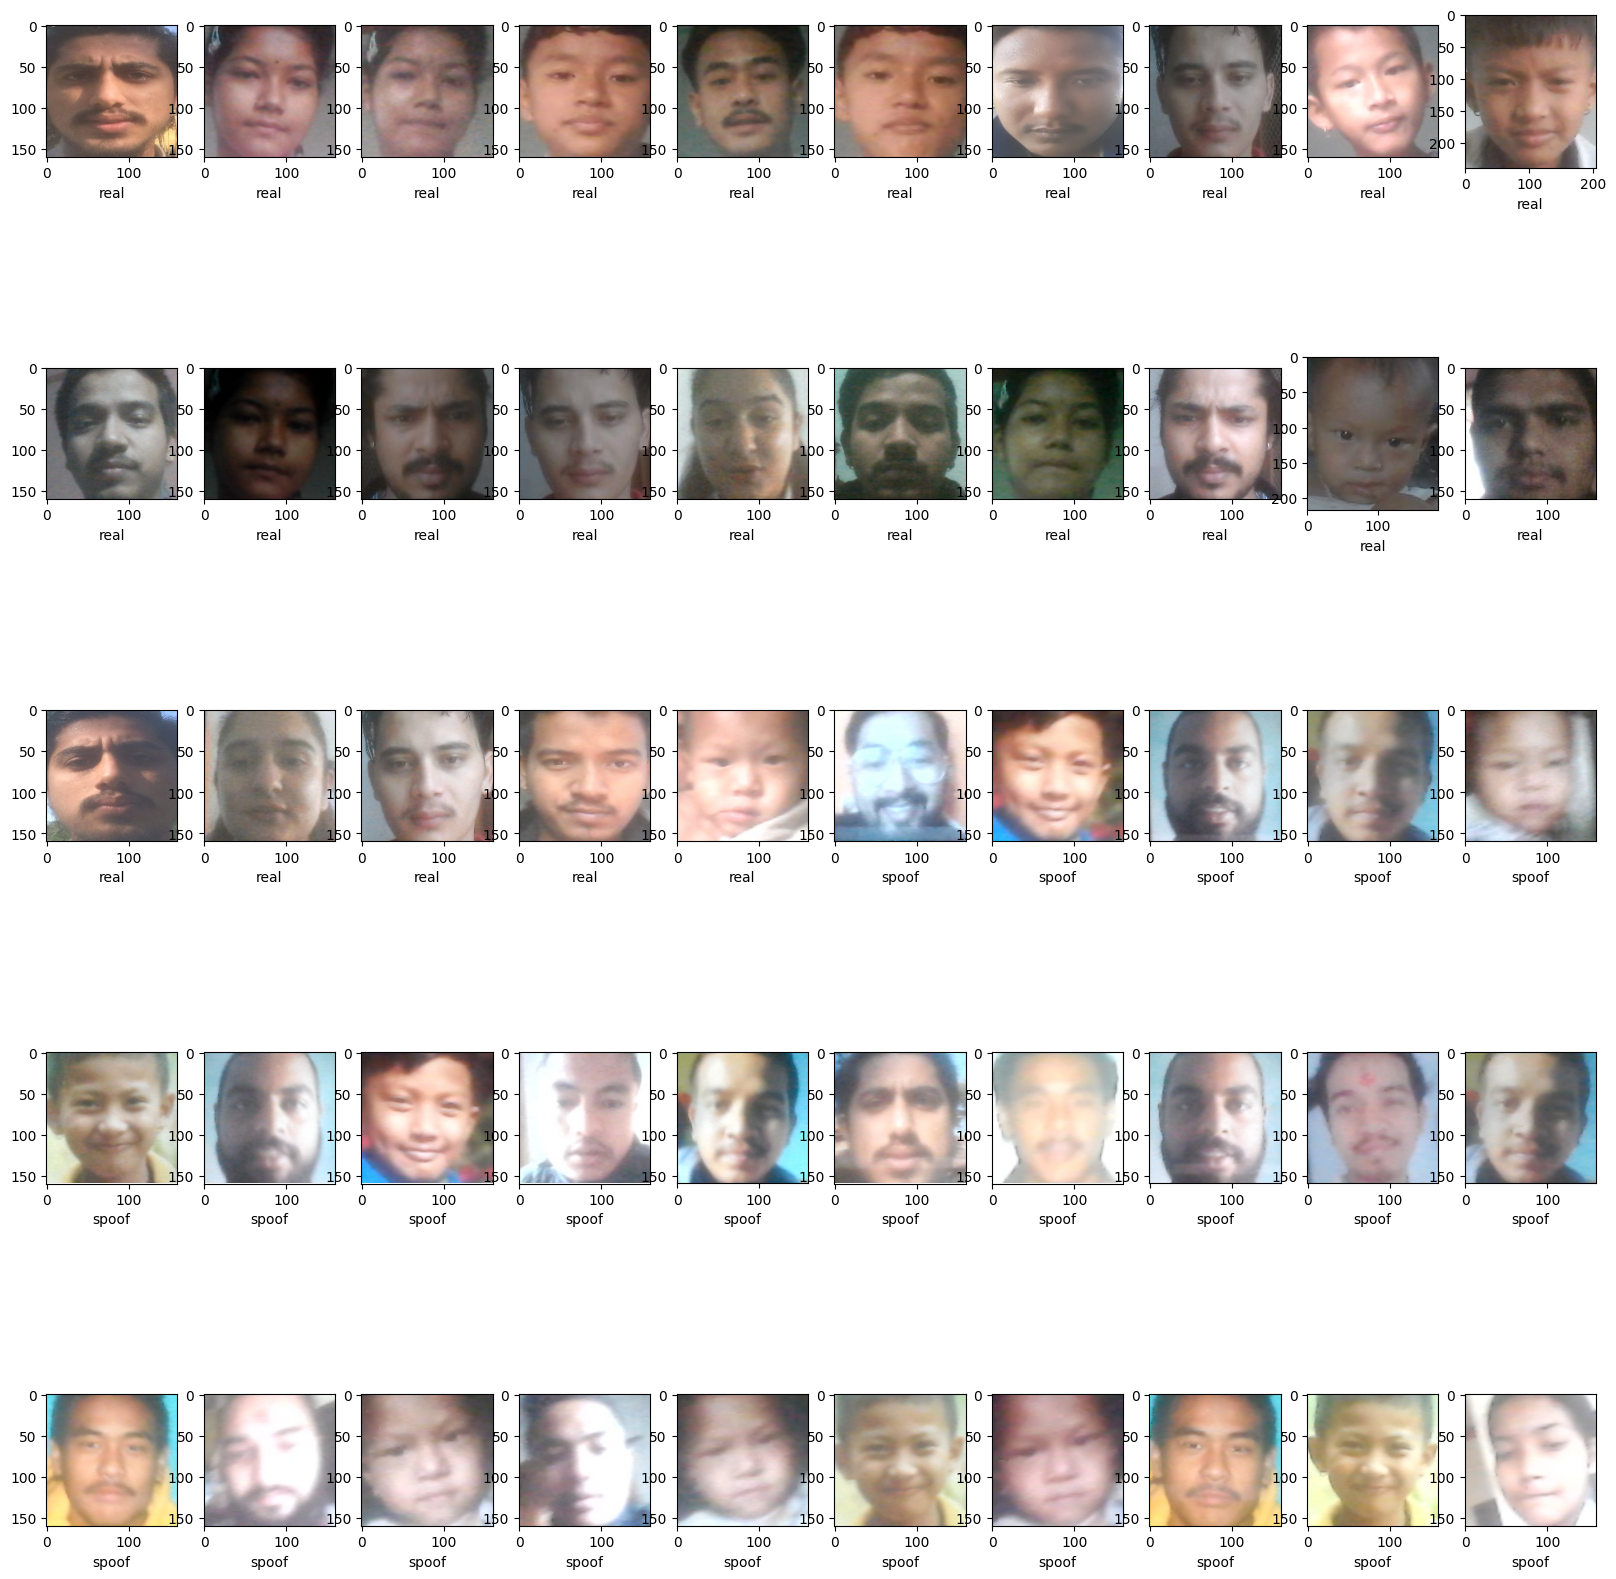

In [ ]:
visualize_dataset(image_path=training_image_path,rows=5,cols=10)

In [ ]:
from keras.layers import Dense,Dropout,Input,Flatten
from keras.models import Model
from keras import optimizers

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import model_from_json
import json

In [ ]:
tgen = ImageDataGenerator(brightness_range=(0.8,1.2),rotation_range=30,width_shift_range = 0.2, height_shift_range = 0.2 , fill_mode ='nearest',shear_range = 0.2 , zoom_range = 0.3 , rescale = 1./255)
vgen = ImageDataGenerator(rescale=1./255)

In [ ]:
traingen = tgen.flow_from_directory(train_dir , target_size = (160 , 160 ) , color_mode = 'rgb' , class_mode = 'binary' , batch_size = 25 , shuffle = True)
validgen = vgen.flow_from_directory(test_dir , target_size = (160 , 160) , color_mode='rgb' , class_mode = 'binary' , batch_size = 25)

Found 4220 images belonging to 2 classes.
Found 951 images belonging to 2 classes.


In [ ]:
mobilenet = MobileNetV2(weights = "imagenet" , include_top = False , input_tensor = Input(shape=(160 , 160 , 3)))

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
mobilenet.trainable = False

In [ ]:
output = Flatten()(mobilenet.output)
output = Dropout(0.3)(output)
output = Dense(units = 8 , activation = 'relu')(output)
prediction = Dense(1 , activation = 'sigmoid')(output)

In [ ]:
model = Model(inputs = mobilenet.input , outputs = prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][0]']           

In [ ]:
from keras import losses
from keras import metrics
model.compile(loss = 'mean_squared_error',optimizer = 'sgd', metrics = [metrics.categorical_accuracy])

In [ ]:
import os
os.mkdir('/content/model_weights/')

In [ ]:
model_checkpoint = ModelCheckpoint('./model_weights/', monitor = 'val_loss', mode = 'min' , verbose = 1 , save_best_only = True , save_weights_only = True)

In [ ]:
history = model.fit(
traingen,
steps_per_epoch = traingen.samples // 25,
validation_data = validgen,
validation_steps = validgen.samples // 25,
epochs = 75,
callbacks=[model_checkpoint] )

Epoch 1/75
168/168 [==============================] - ETA: 0s - loss: 0.0942 - categorical_accuracy: 1.0000
Epoch 1: val_loss improved from inf to 0.02309, saving model to ./model_weights/
168/168 [==============================] - 139s 808ms/step - loss: 0.0942 - categorical_accuracy: 1.0000 - val_loss: 0.0231 - val_categorical_accuracy: 1.0000
Epoch 2/75
168/168 [==============================] - ETA: 0s - loss: 0.0404 - categorical_accuracy: 1.0000
Epoch 2: val_loss improved from 0.02309 to 0.01198, saving model to ./model_weights/
168/168 [==============================] - 142s 843ms/step - loss: 0.0404 - categorical_accuracy: 1.0000 - val_loss: 0.0120 - val_categorical_accuracy: 1.0000
Epoch 3/75
168/168 [==============================] - ETA: 0s - loss: 0.0315 - categorical_accuracy: 1.0000
Epoch 3: val_loss did not improve from 0.01198
168/168 [==============================] - 137s 816ms/step - loss: 0.0315 - categorical_accuracy: 1.0000 - val_loss: 0.0411 - val_categorical_acc

In [ ]:
model_json = model.to_json()
with open("finalyearproject_antispoofing_model_mobilenet.json" , "w") as json_file:
  json_file.write(model_json)

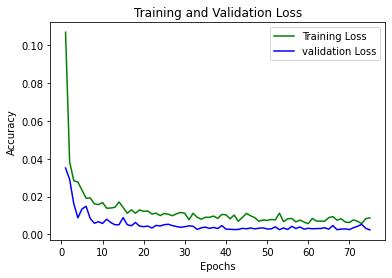

In [ ]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,76)
plt.plot(epochs,train_loss,'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
categories = ['real','spoof']

In [ ]:
from keras.preprocessing import image
import numpy as np
def check_fakes(path,category_type):
  predictor = {}
  path = os.path.join(path,category_type)
  for img in os.listdir(path):
    try:
      img = image.load_img(os.path.join(path,img),target_size=(160,160))
      img = image.img_to_array(img)
      img = np.expand_dims(img,axis=0)
      img = img / 255.0
      prediction = model.predict(img)
      if prediction > 0.5:
        prediction_class = 1
      else:
        prediction_class = 0
      result = categories[prediction_class]
      if result not in predictor:
        predictor[result] = 1
      else:
        predictor[result] += 1
    except Exception as e:
      pass
  return predictor

In [ ]:
check_fakes(test_dir,categories[1])

{'real': 19 , 'spoof': 455}


In [ ]:
check_fakes(test_dir,categories[0])

{'real': 471 , 'spoof': 6}


In [ ]:
(19+6)/(19+455+471+6)*100

2.6288117770767614

In [ ]:
100-2.6288

97.3712